In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from gtts import gTTS
import os

In [2]:
yolo = cv2.dnn.readNet("./yolov5.weights" , "./yolov5.cfg")

In [3]:
classes = []
with open("./coco.names",'r') as f:
  classes = f.read().splitlines()

In [4]:
len(classes)

80

In [5]:
img = cv2.imread("./test1.png")
height , width, _ = img.shape
print(img.shape)

(933, 1400, 3)


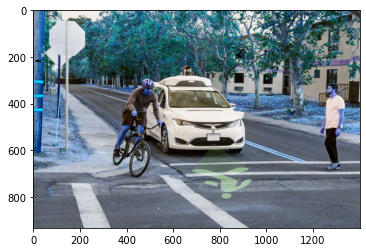

In [6]:
plt.imshow(img)

In [7]:
blob = cv2.dnn.blobFromImage(img,1/255,(320,320),(0,0,0),swapRB=True,crop=False)

In [8]:
blob.shape

(1, 3, 320, 320)

In [9]:
blob.size

307200

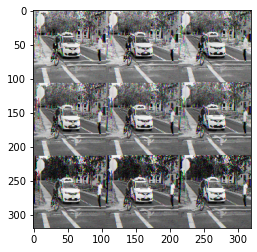

In [10]:
i= blob[0].reshape(320,320,3)
plt.imshow(i)

In [11]:
yolo.setInput(blob)

In [12]:
output_layes_name = yolo.getUnconnectedOutLayersNames()
layeroutput = yolo.forward(output_layes_name)

In [13]:
boxes = []
confidences = []
class_ids = []

for output in layeroutput:
  for detection in output:
    score = detection[5:]
    class_id = np.argmax(score)
    confidence = score[class_id]
    if confidence > 0.7:
      center_x = int(detection[0]*width)
      center_y = int(detection[1]*height)
      w = int(detection[2]*width)
      h = int(detection[3]*height)

      x = int(center_x-w/2)
      y = int(center_y-h/2)

      boxes.append([x,y,w,h])
      confidences.append((float(confidence)))
      class_ids.append(class_id)

In [14]:
len(boxes)

19

In [15]:
indexes = cv2.dnn.NMSBoxes(boxes ,confidences , 0.5 , 0.4)

In [16]:
font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform (0,255,size=(len(boxes),3))

In [17]:
result = {}

In [18]:
for i in indexes.flatten():
  x,y,w,h = boxes[i]
  label = str(classes[class_ids[i]])
  confi = str(round(confidences[i],3))
  color = colors[i]
  
  result.update({label : confi})

  cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
  cv2.putText(img,label + " " + confi,(x,y+20),font,2,(1,1,1),2)

In [19]:
result

{'person': '0.999', 'car': '0.992', 'bicycle': '0.991', 'stop sign': '0.97'}

In [20]:
cv2.imshow("image",img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
import playsound

In [22]:
dict1 = {
            'person' : 1,
            'bicycle' : 2,
            'car' : 3,
            'motorbike' : 4,
            'aeroplane' : 5,
            'bus' : 6,
            'train' : 7,
            'truck' : 8,
            'boat' : 9,
            'traffic light' : 10,
            'fire hydrant' : 11,
            'stop sign' : 12,
            'parking meter' : 13,
            'bench' : 14,
            'bird' : 15,
            'cat' : 16,
            'dog' : 17,
            'horse' : 18,
            'sheep' : 19,
            'cow' : 20,
            'elephant' : 21,
            'bear' : 22,
            'zebra' : 23,
            'giraffe' : 24,
            'backpack' : 25,
            'umbrella' : 26,
            'handbag' : 27,
            'tie' : 28,
            'suitcase' : 29,
            'frisbee' : 30,
            'skis' : 31,
            'snowboard' : 32,
            'sports ball' : 33,
            'kite' : 34,
            'baseball bat' : 35,
            'baseball glove' : 36,
            'skateboard' : 37,
            'surfboard' : 38,
            'tennis racket' : 39,
            'bottle' : 40,
            'wine glass' : 41,
            'cup' : 42,
            'fork' : 43,
            'knife' : 44,
            'spoon' : 45,
            'bowl' : 46,
            'banana' : 47,
            'apple' : 48,
            'sandwich' : 49,
            'orange' : 50,
            'broccoli' : 51,
            'carrot' : 52,
            'hot dog' : 53,
            'pizza' : 54,
            'donut' : 55,
            'cake' : 56,
            'chair' : 57,
            'sofa' : 58,
            'pottedplant' : 59,
            'bed' : 60,
            'diningtable' : 61,
            'toilet' : 62,
            'tvmonitor' : 63,
            'laptop' : 64,
            'mouse' : 65,
            'remote' : 66,
            'keyboard' : 67,
            'cell phone' : 68,
            'microwave' : 69,
            'oven' : 70,
            'toaster' : 71,
            'sink' : 72,
            'refrigerator' : 73,
            'book' : 74,
            'clock' : 75,
            'vase' : 76,
            'scissors' : 77,
            'teddy bear' : 78,
            'hair drier' : 79,
            'toothbrush' : 80

}


dict2 = {
             1 : 'The detected object is person',
             2 : 'The detected object is bicycle',
             3 : 'The detected object is car',
             4 : 'The detected object is motorbike',
             5 : 'The detected object is aeroplane',
             6 : 'The detected object is bus',
             7 : 'The detected object is train',
             8 : 'The detected object is truck',
             9 : 'The detected object is boat',
             10 : 'The detected object is traffic light',
             11 : 'The detected object is fire hydrant',
             12 : 'The detected object is stop sign',
             13 : 'The detected object is parking meter',
             14 : 'The detected object is bench',
             15 : 'The detected object is bird',
             16 : 'The detected object is cat',
             17 : 'The detected object is dog',
             18 : 'The detected object is horse',
             19 : 'The detected object is sheep',
             20 : 'The detected object is cow',
             21 : 'The detected object is elephant',
             22 : 'The detected object is bear',
             23 : 'The detected object is zebra',
             24 : 'The detected object is giraffe',
             25 : 'The detected object is backpack',
             26 : 'The detected object is umbrella',
             27 : 'The detected object is handbag',
             28 : 'The detected object is tie',
             29 : 'The detected object is suitcase',
             30 : 'The detected object is frisbee',
             31 : 'The detected object is skis',
             32 : 'The detected object is snowboard',
             33 : 'The detected object is sports ball',
             34 : 'The detected object is kite',
             35 : 'The detected object is baseball bat',
             36 : 'The detected object is baseball glove',
             37 : 'The detected object is skateboard',
             38 : 'The detected object is surfboard',
             39 : 'The detected object is tennis racket',
             40 : 'The detected object is bottle',
             41 : 'The detected object is wine glass',
             42 : 'The detected object is cup',
             43 : 'The detected object is fork',
             44 : 'The detected object is knife',
             45 : 'The detected object is spoon',
             46 : 'The detected object is bowl',
             47 : 'The detected object is banana',
             48 : 'The detected object is apple',
             49 : 'The detected object is sandwich',
             50 : 'The detected object is orange',
             51 : 'The detected object is broccoli',
             52 : 'The detected object is carrot',
             53 : 'The detected object is hot dog',
             54 : 'The detected object is pizza',
             55 : 'The detected object is donut',
             56 : 'The detected object is cake',
             57 : 'The detected object is chair',
             58 : 'The detected object is sofa',
             59 : 'The detected object is pottedplant',
             60 : 'The detected object is bed',
             61 : 'The detected object is diningtable',
             62 : 'The detected object is toilet',
             63 : 'The detected object is tvmonitor',
             64 : 'The detected object is laptop',
             65 : 'The detected object is mouse',
             66 : 'The detected object is remote',
             67 : 'The detected object is keyboard',
             68 : 'The detected object is cell phone',
             69 : 'The detected object is microwave',
             70 : 'The detected object is oven',
             71 : 'The detected object is toaster',
             72 : 'The detected object is sink',
             73 : 'The detected object is refrigerator',
             74 : 'The detected object is book',
             75 : 'The detected object is clock',
             76 : 'The detected object is vase',
             77 : 'The detected object is scissors',
             78 : 'The detected object is teddy bear',
             79 : 'The detected object is hair drier',
             80 : 'The detected object is toothbrush'
            
      
        
}



def object_map(class_cat):
 
    return dict1[class_cat]



def voice_map(cat_no):
    
    res = object_map(cat_no)
    return dict2[res]




def main():
    
    #object dectection : output 
    #will be input to the following function

    for key,value in result.items():
        
        print(voice_map(key))
        '''voice = (voice_map(key))
        myobj =gTTS(text=voice, lang='en', slow=False)
        myobj.save("welcome.mp3")
        
        playsound.playsound("welcome.mp3")
        #os.system("mpg321 welcome.mp3")'''
    
    
    
    
    
if __name__ == "__main__":
    main()
    
    

The detected object is person
The detected object is car
The detected object is bicycle
The detected object is stop sign
